In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 그래프 스타일 지정 : 맑은 고딕 폰트 설정 (한글 출력을 위해)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

# 1

In [2]:
excel = pd.read_excel('Data/2022년 10월 교통카드 통계자료.xls', sheet_name = '지하철 유무임별 이용현황')
excel.to_csv('Data/subwayfee.csv', encoding = 'UTF-8')

data = pd.read_csv('Data/subwayfee.csv', encoding = 'UTF-8')
data.head()

,Unnamed: 0,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,0,2022-10,1호선,150,서울역,"1,307,627","1,279,921","218,542","210,320",2022-11-03 10:23:08
1,1,2022-10,1호선,151,시청,"638,454","654,541","119,508","116,903",2022-11-03 10:23:08
2,2,2022-10,1호선,152,종각,"893,135","864,755","153,798","143,813",2022-11-03 10:23:08
3,3,2022-10,1호선,153,종로3가,"499,373","442,702","319,982","296,084",2022-11-03 10:23:08
4,4,2022-10,1호선,154,종로5가,"442,041","447,014","260,373","250,139",2022-11-03 10:23:08


In [3]:
# 데이터의 (,)제거
data['유임승차'] = data['유임승차'].str.replace(',','')
data['유임하차'] = data['유임하차'].str.replace(',','')
data['무임승차'] = data['무임승차'].str.replace(',','')
data['무임하차'] = data['무임하차'].str.replace(',','')

# 데이터를 int형으로 변환
data['유임승차'] = data['유임승차'].astype(int)
data['유임하차'] = data['유임하차'].astype(int)
data['무임승차'] = data['무임승차'].astype(int)
data['무임하차'] = data['무임하차'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  615 non-null    int64 
 1   사용월         615 non-null    object
 2   호선명         615 non-null    object
 3   역ID         615 non-null    int64 
 4   지하철역        615 non-null    object
 5   유임승차        615 non-null    int32 
 6   유임하차        615 non-null    int32 
 7   무임승차        615 non-null    int32 
 8   무임하차        615 non-null    int32 
 9   작업일시        615 non-null    object
dtypes: int32(4), int64(2), object(4)
memory usage: 38.6+ KB


In [4]:
# 등호 (data = ) 빼먹지 않도록 주의!
data = data.drop(columns = '작업일시')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  615 non-null    int64 
 1   사용월         615 non-null    object
 2   호선명         615 non-null    object
 3   역ID         615 non-null    int64 
 4   지하철역        615 non-null    object
 5   유임승차        615 non-null    int32 
 6   유임하차        615 non-null    int32 
 7   무임승차        615 non-null    int32 
 8   무임하차        615 non-null    int32 
dtypes: int32(4), int64(2), object(3)
memory usage: 33.8+ KB


In [5]:
data.describe()

,Unnamed: 0,역ID,유임승차,유임하차,무임승차,무임하차
count,615.000000,615.000000,6.150000e+02,6.150000e+02,615.000000,615.000000
mean,307.000000,1925.426016,2.743329e+05,2.736899e+05,59123.193496,58486.723577
std,177.679487,1206.046422,2.754089e+05,2.814336e+05,48832.818329,48478.343749
min,0.000000,150.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,153.500000,1203.500000,9.269750e+04,8.808850e+04,23992.000000,24146.000000
50%,307.000000,1823.000000,2.029260e+05,1.897940e+05,47113.000000,45468.000000
75%,460.500000,2635.500000,3.605525e+05,3.680550e+05,76208.500000,75311.500000
max,614.000000,4713.000000,2.190921e+06,2.159810e+06,319982.000000,309026.000000


# 2

In [6]:
# 이상치 처리 (유/무임 승/하차가 0인 경우)
data['유임승차'] = np.where(data['유임승차'] != 0, data['유임승차'], np.nan)
data['유임하차'] = np.where(data['유임하차'] != 0, data['유임하차'], np.nan)
data['무임승차'] = np.where(data['무임승차'] != 0, data['무임승차'], np.nan)
data['무임하차'] = np.where(data['무임하차'] != 0, data['무임하차'], np.nan)

data.dropna()
data.describe()

,Unnamed: 0,역ID,유임승차,유임하차,무임승차,무임하차
count,615.000000,615.000000,6.150000e+02,6.030000e+02,607.000000,603.000000
mean,307.000000,1925.426016,2.743329e+05,2.791365e+05,59902.411862,59650.638474
std,177.679487,1206.046422,2.754089e+05,2.815330e+05,48676.180133,48243.684112
min,0.000000,150.000000,1.000000e+00,7.510000e+02,2.000000,94.000000
25%,153.500000,1203.500000,9.269750e+04,9.243650e+04,25341.000000,26392.500000
50%,307.000000,1823.000000,2.029260e+05,1.947580e+05,47656.000000,46245.000000
75%,460.500000,2635.500000,3.605525e+05,3.710720e+05,76637.500000,75728.500000
max,614.000000,4713.000000,2.190921e+06,2.159810e+06,319982.000000,309026.000000


In [7]:
# 유임승차비율1 (유임승차 / 무임승차)
data['rate1'] = data['유임승차'] / data['무임승차']

# 유임승차비율2 (유임승차 / (유임승차 + 무임승차))
data['rate2'] = data['유임승차'] / (data['유임승차'] + data['무임승차'])

# 유/무임 승차 인원이 100,000명 이상인 경우만 조사 대상으로
data = data.query('유임승차 + 무임승차 >= 100000')

data.head()

,Unnamed: 0,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate1,rate2
0,0,2022-10,1호선,150,서울역,1307627.0,1279921.0,218542.0,210320.0,5.983413,0.856804
1,1,2022-10,1호선,151,시청,638454.0,654541.0,119508.0,116903.0,5.342354,0.842330
2,2,2022-10,1호선,152,종각,893135.0,864755.0,153798.0,143813.0,5.807195,0.853097
3,3,2022-10,1호선,153,종로3가,499373.0,442702.0,319982.0,296084.0,1.560628,0.609471
4,4,2022-10,1호선,154,종로5가,442041.0,447014.0,260373.0,250139.0,1.697722,0.629317


In [8]:
data.describe()

,Unnamed: 0,역ID,유임승차,유임하차,무임승차,무임하차,rate1,rate2
count,496.000000,496.000000,4.960000e+02,4.960000e+02,496.000000,496.000000,496.000000,496.000000
mean,296.707661,1919.294355,3.308955e+05,3.304529e+05,70280.520161,69509.528226,5.063589,0.804759
std,183.732428,1205.572634,2.781574e+05,2.853403e+05,47896.990288,47606.802243,2.838117,0.078627
min,0.000000,150.000000,4.551600e+04,3.736100e+04,10832.000000,3601.000000,0.493714,0.330528
25%,131.750000,1015.750000,1.507878e+05,1.455898e+05,37432.250000,36943.000000,3.156535,0.759415
50%,272.500000,1861.000000,2.438560e+05,2.339660e+05,58345.500000,57646.500000,4.380876,0.814157
75%,464.250000,2639.250000,4.145400e+05,4.157520e+05,86813.500000,84861.750000,6.019985,0.857549
max,614.000000,4711.000000,2.190921e+06,2.159810e+06,319982.000000,309026.000000,20.732206,0.953985


# 3

In [9]:
data['전체인원'] = data['유임승차'] + data['유임하차'] + data['무임승차'] + data['무임하차']
data['유임인원'] = data['유임승차'] + data['유임하차']
data['무임인원'] = data['무임승차'] + data['무임하차']
data.head()

,Unnamed: 0,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate1,rate2,전체인원,유임인원,무임인원
0,0,2022-10,1호선,150,서울역,1307627.0,1279921.0,218542.0,210320.0,5.983413,0.856804,3016410.0,2587548.0,428862.0
1,1,2022-10,1호선,151,시청,638454.0,654541.0,119508.0,116903.0,5.342354,0.842330,1529406.0,1292995.0,236411.0
2,2,2022-10,1호선,152,종각,893135.0,864755.0,153798.0,143813.0,5.807195,0.853097,2055501.0,1757890.0,297611.0
3,3,2022-10,1호선,153,종로3가,499373.0,442702.0,319982.0,296084.0,1.560628,0.609471,1558141.0,942075.0,616066.0
4,4,2022-10,1호선,154,종로5가,442041.0,447014.0,260373.0,250139.0,1.697722,0.629317,1399567.0,889055.0,510512.0


In [10]:
# 유임 승/하차 인원 1위
data.sort_values('유임인원', ascending = False).head(1)

,Unnamed: 0,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate1,rate2,전체인원,유임인원,무임인원
25,25,2022-10,2호선,216,잠실(송파구청),2190921.0,2159810.0,218589.0,204196.0,10.023016,0.909281,4773516.0,4350731.0,422785.0


In [11]:
# 무임 승/하차 인원 1위
data.sort_values('무임인원', ascending = False).head(1)

,Unnamed: 0,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate1,rate2,전체인원,유임인원,무임인원
3,3,2022-10,1호선,153,종로3가,499373.0,442702.0,319982.0,296084.0,1.560628,0.609471,1558141.0,942075.0,616066.0


In [12]:
# 유/무임 승/하차 인원 1위
data.sort_values('전체인원', ascending = False).head(1)

,Unnamed: 0,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate1,rate2,전체인원,유임인원,무임인원
25,25,2022-10,2호선,216,잠실(송파구청),2190921.0,2159810.0,218589.0,204196.0,10.023016,0.909281,4773516.0,4350731.0,422785.0


# 4

In [13]:
proportion = data.groupby('지하철역', as_index = False)\
                 ['유임인원', '무임인원']\
                 .value_counts()

proportion.head()

C:\Users\PGJeong\AppData\Local\Temp\ipykernel_18824\4237168664.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  proportion = data.groupby('지하철역', as_index = False)\


,지하철역,유임인원,무임인원,count
0,4.19민주묘지,151537.0,71528.0,1
1,가능,278042.0,121257.0,1
2,가락시장,357265.0,152299.0,1
3,가락시장,333668.0,127043.0,1
4,가산디지털단지,2018757.0,172018.0,1


In [14]:
proportion = proportion.drop(columns = 'count')\
                       .set_index('지하철역')\

proportion.head()

,유임인원,무임인원
지하철역,,
4.19민주묘지,151537.0,71528.0
가능,278042.0,121257.0
가락시장,357265.0,152299.0
가락시장,333668.0,127043.0
가산디지털단지,2018757.0,172018.0


In [15]:
proportion = proportion.sort_values('유임인원', ascending = False).head(10)
proportion

,유임인원,무임인원
지하철역,,
잠실(송파구청),4350731.0,422785.0
강남,4026906.0,290156.0
홍대입구,3943299.0,193860.0
신림,2898041.0,407891.0
구로디지털단지,2865182.0,377462.0
삼성(무역센터),2710923.0,231522.0
서울역,2587548.0,428862.0
고속터미널,2560650.0,399284.0
신도림,2503736.0,407618.0


<AxesSubplot: ylabel='지하철역'>

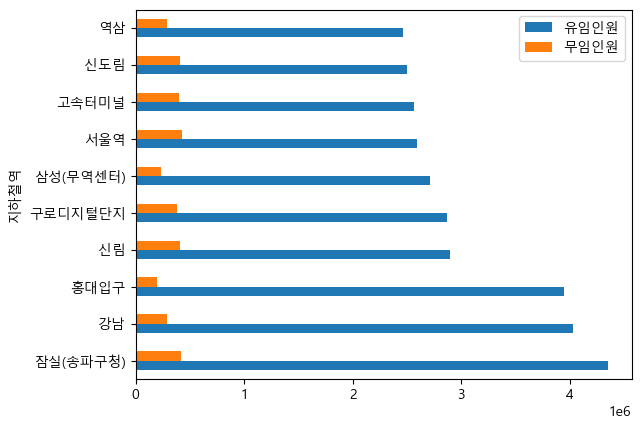

In [16]:
proportion.plot.barh()

<AxesSubplot: ylabel='지하철역'>

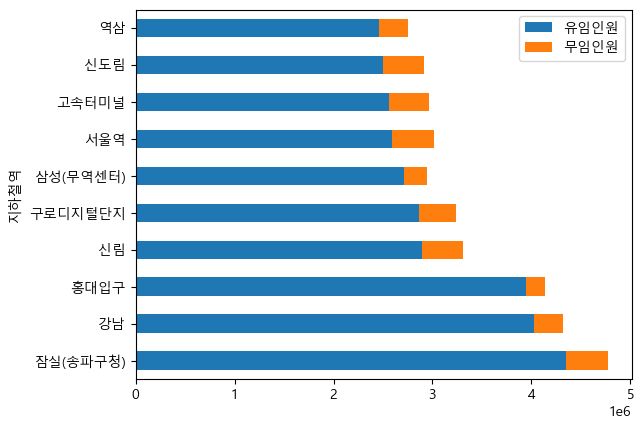

In [17]:
proportion.plot.barh(stacked = True)